In [ ]:
# Description :This program uses an artificial recurrent neural network called Long short term Memory(LSTM)
#             to predict the closing stock proce of a corporation (State Bank of India SBIN) using the past 60 day stock price.

In [ ]:
#Imprt the libraries.
import math
import pandas_datareader as web
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, LSTM
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

In [ ]:
# get the stock quote
df = web.DataReader('SBIN.NS', data_source='yahoo', start='2012-01-01',end='2021-08-06')
# show the data
df

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2012-01-02,163.600006,161.139999,162.899994,162.764999,14464990.0,147.880875
2012-01-03,171.000000,164.300003,164.399994,170.565002,21341020.0,154.967636
2012-01-04,171.389999,167.520004,171.199997,169.604996,22241630.0,154.095413
2012-01-05,171.854996,168.005005,169.600006,169.244995,21344840.0,153.768341
2012-01-06,170.759995,165.804993,167.500000,167.274994,21137420.0,151.978455
...,...,...,...,...,...,...
2021-06-02,437.950012,429.149994,430.799988,437.250000,38657806.0,433.250000
2021-06-03,441.950012,433.500000,437.000000,439.649994,38909199.0,439.649994
2021-06-04,441.899994,431.750000,437.500000,433.600006,36898769.0,433.600006


In [ ]:
# get the number of rows and coloum in the data set
df.shape


(2321, 6)

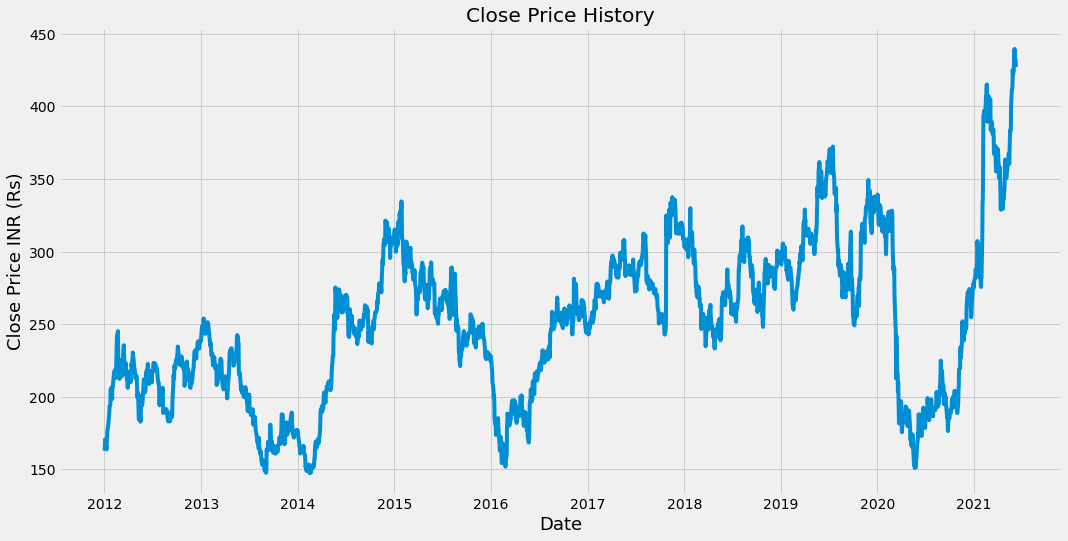

In [ ]:
#visualize the closing price history of SBIN
plt.figure(figsize=(16,8))
plt.title('Close Price History')
plt.plot(df['Close'])
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price INR (Rs)', fontsize=18)
plt.show()

In [ ]:
# Create a new dataframe with only the 'close column'
data =df.filter(['Close'])
#convert the dataframe to a numpy array
dataset =data.values
#get the number of rows to train the model on

training_data_len = math.ceil( len(dataset) * .8)

training_data_len 


1857

In [ ]:
#SCLAE THE DATA
scaler = MinMaxScaler(feature_range=(0,1))
scaled_data =scaler.fit_transform(dataset)

scaled_data

array([[0.0527045 ],
       [0.07939034],
       [0.07610591],
       ...,
       [0.97930142],
       [0.9746827 ],
       [0.95740538]])

In [ ]:
#create the training data set
#create the scled dataset
train_data =scaled_data[0:training_data_len, :]
#split the dta into x_train and y_train
x_train =[]
y_train =[]

for i in range(60, len(train_data)):
  x_train.append(train_data[i-60:i,0])
  y_train.append(train_data[i, 0])
  if i<=61:
    print(x_train)
    print(y_train)
    print()


[array([0.0527045 , 0.07939034, 0.07610591, 0.07487425, 0.06813437,
       0.05598894, 0.07834683, 0.08667764, 0.09949024, 0.10349311,
       0.11728078, 0.12672344, 0.13402786, 0.14051111, 0.15712137,
       0.15973863, 0.19405386, 0.19993843, 0.19398542, 0.17504873,
       0.20117009, 0.20666119, 0.20493344, 0.21538542, 0.2357419 ,
       0.23247459, 0.24090798, 0.24304627, 0.23890658, 0.22431491,
       0.24857163, 0.265849  , 0.29995896, 0.32277876, 0.33489   ,
       0.26733724, 0.26921894, 0.25043621, 0.2221253 , 0.25921175,
       0.26478842, 0.25493517, 0.26449759, 0.24032638, 0.23067845,
       0.22852304, 0.25755243, 0.28642787, 0.29214137, 0.3014814 ,
       0.28249339, 0.2580656 , 0.23399708, 0.24419242, 0.25975916,
       0.23504054, 0.23714463, 0.22027779, 0.22428066, 0.20720861])]
[0.20108452306455626]

[array([0.0527045 , 0.07939034, 0.07610591, 0.07487425, 0.06813437,
       0.05598894, 0.07834683, 0.08667764, 0.09949024, 0.10349311,
       0.11728078, 0.12672344, 0.13

In [ ]:
#convert the x_train and y_train to numpy arrays

x_train, y_train = np.array(x_train), np.array(y_train)

In [ ]:
#Reshape the data
x_train = np.reshape(x_train,(x_train.shape[0],x_train.shape[1], 1))
x_train.shape


(1797, 60, 1)

In [ ]:
#Build the LSTM model
model = Sequential()
model.add(LSTM(50, return_sequences=True, input_shape= (x_train.shape[1],1)))
model.add(LSTM(50, return_sequences= False))
model.add(Dense(25))
model.add(Dense(1))


In [ ]:
#complie the model

model.compile(optimizer='adam', loss='mean_squared_error')

In [ ]:
#Train the model
model.fit(x_train, y_train, batch_size=1, epochs=1)


1797/1797 [==============================] - 44s 20ms/step - loss: 0.0039


In [ ]:
# Create the testing data set
#create a new array containing scaled values from index 1797 to 2321
test_data = scaled_data[training_data_len - 60: , :]
#create the data set x_test and y_test
x_test = []
y_test = dataset[training_data_len:, :]
for i in range(60, len(test_data)):
  x_test.append(test_data[i-6:i, 0])



In [ ]:
#convert the data into a numpy array
x_test = np.array(x_test)

In [ ]:
#Reshape the data
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))

In [ ]:
#Get the models predicted price value
predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions)

In [ ]:
# Get the root mean squared error(RMSE)
rmse = np.sqrt(np.mean( predictions - y_test)**2)
rmse

7.3956154790417905

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


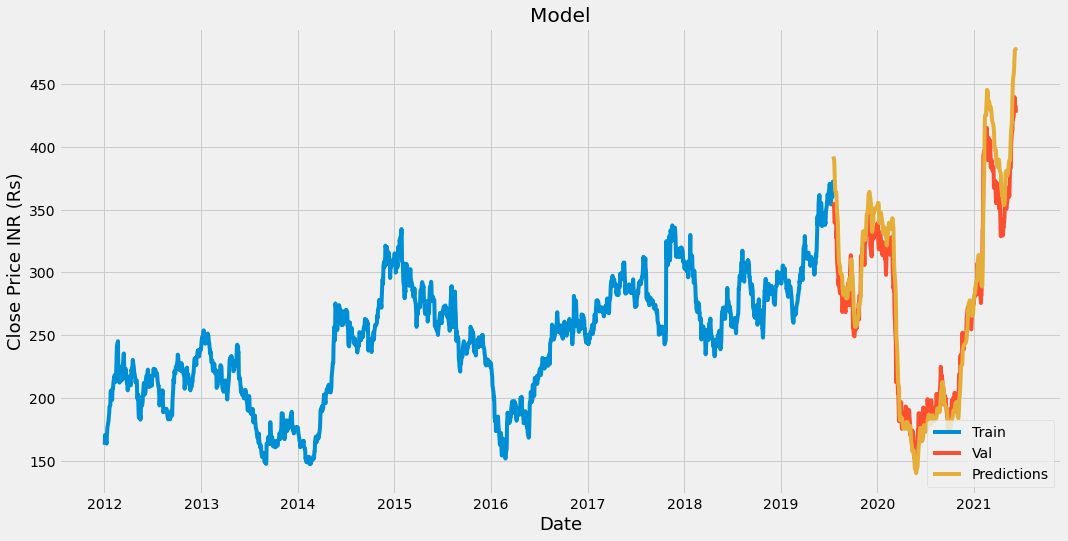

In [ ]:
#Plot the data
train = data[:training_data_len]
valid = data[training_data_len:]
valid['Predictions'] = predictions
#visualize the data
plt.figure(figsize=(16,8))
plt.title('Model')
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price INR (Rs)', fontsize=18)
plt.plot(train['Close'])
plt.plot(valid[['Close','Predictions']])
plt.legend(['Train', 'Val', 'Predictions'], loc='lower right')
plt.show()

In [ ]:
#show the valid and predicted prices
valid

,Close,Predictions
Date,,
2019-07-19,356.000000,392.484406
2019-07-22,350.850006,389.297241
2019-07-23,342.200012,383.944977
2019-07-24,339.600006,376.310608
2019-07-25,341.299988,369.200836
...,...,...
2021-06-02,437.250000,466.085236
2021-06-03,439.649994,471.759521
2021-06-04,433.600006,476.803864


In [ ]:
#Get the quote
sbin_quote = web.DataReader('SBIN.NS', data_source='yahoo', start='2012-01-01',end='2020-11-09')
#create a new data frame
new_df = sbin_quote.filter(['Close'])
#get the last 60 day closing price values and convert the dataframe to array
last_60_days = new_df[-60:].values
#scale the data to be values between 0 and 1
last_60_days_scaled = scaler.transform(last_60_days)
#create an empty list
X_test = []
#APPEND the past 60 days
X_test.append(last_60_days_scaled)
#convert the X_test data set to a numpy array
X_test = np.array(X_test)
#Reshape the data
X_test = np.reshape(X_test,(X_test.shape[0], X_test.shape[1], 1))
#get the predicted scaled price
pred_price = model.predict(X_test)
#undo the scaling
pred_price = scaler.inverse_transform(pred_price)
print(pred_price)

[[220.36404]]


In [ ]:
#Get the quote
sbin_quote2 = sbin_quote = web.DataReader('SBIN.NS', data_source='yahoo', start='2020-11-9', end='2020-11-9')
print(sbin_quote2['Close'])

Date
2020-11-09    219.500000
2020-11-10    231.699997
Name: Close, dtype: float64
